In [176]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [177]:
import numpy as np
import pandas as pd
import datetime as dt
import pprint 

## Reflect Tables into SQLALchemy ORM

In [178]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [179]:
# create engine to hawaii.sqlite
source ="sqlite:///Resources/hawaii.sqlite"
engine = create_engine(source)

In [180]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect =True)
# reflect the tables

In [181]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [182]:
# Save references to each table
Measurement=Base.classes.measurement
Station = Base.classes.station


In [183]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [184]:
#queries all columns from measurement and station tables from the hawaii database
measurement_db=session.query(Measurement.id, Measurement.station,Measurement.date,Measurement.prcp,Measurement.tobs).all()
station_db = session.query(Station.id,Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation).all()
#converts database table into a pandas dataframe
measurement_df=pd.DataFrame(measurement_db, columns =['id','station','date','prc',"tobs"])
station_df = pd.DataFrame(station_db, columns=['id','station','name','latitude','longitude','elevation'])

## Bonus Challenge Assignment: Temperature Analysis II

In [185]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [186]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
start_year='2017'
start_month='01'
start_day ='28'
end_year='2017'
end_month='08'
end_day='07'
start_date=f'{year}-{start_month}-{start_day}'
end_date=f'{year}-{end_month}-{end_day}'
tmin,tavg,tmax=calc_temps(start_date,end_date)[0]
print(f"The minimum, average, maximum temperatures for Hawaii from {start_date} to {end_date}:\n     -Minimum Temperature: {tmin} °F\n     -Average Temperature: {round(tavg,1)} °F\n     -Maximum Temperature: {tmax} °F\n")

The minimum, average, maximum temperatures for Hawaii from 2017-01-28 to 2017-08-07:
     -Minimum Temperature: 58.0 °F
     -Average Temperature: 74.5 °F
     -Maximum Temperature: 87.0 °F



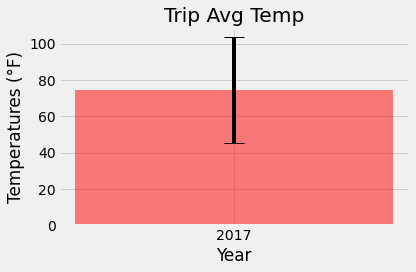

In [187]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots()
ax.bar(year,tavg, yerr=[tmax-tmin],align='center',alpha=0.5, ecolor='black',capsize=10, color = 'red')
ax.set_ylabel('Temperatures (°F)')
ax.set_title("Trip Avg Temp")
ax.set_xlabel('Year')
ax.yaxis.grid(True)
plt.tight_layout()
plt.savefig(f"{year}_Trip_Avg_Temp.png")
plt.show()

### Daily Rainfall Average

In [188]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
station_name_rainfall = session.query(func.sum(Measurement.prcp),Measurement.station,Station.name, Station.latitude, Station.longitude, Station.elevation).\
    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
    filter(Measurement.station == Station.station).\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()
station_name_rainfall

[(58.310000000000024,
  'USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 (41.84,
  'USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 (33.870000000000005,
  'USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6),
 (26.139999999999993,
  'USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 (21.000000000000007,
  'USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 (10.409999999999993,
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 (3.39, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)]

In [189]:
Total_Amount_of_Rainfall_Per_Weather_Station_df= pd.DataFrame(station_name_rainfall, columns=["prcp_total","station","name","latitude","longitude","elevation"])
Total_Amount_of_Rainfall_Per_Weather_Station_df

,prcp_total,station,name,latitude,longitude,elevation
0,58.31,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,41.84,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,33.87,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,26.14,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
4,21.00,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
5,10.41,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
6,3.39,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9


In [190]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")[0]

(62.0, 69.15384615384616, 77.0)

In [191]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates
trip_dates= session.query(Measurement.date).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
dates_trip=[]
range_dates=[]
for d in trip_dates:
# Strip off the year and save a list of strings in the format %m-%d
    range_dates.append(d[0][5:])
    dates_trip.append(d[0])
# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.
normals=[]
for r in range_dates:
    results=daily_normals(r)[0]
    normals.append(results)

In [192]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
daily_normals_df = pd.DataFrame(normals, columns =["TMIN","TAVG","TMAX"])
daily_normals_df["date"]=dates_trip
daily_normals_df['date']=pd.to_datetime(daily_normals_df['date'])
daily_normals_df=daily_normals_df.set_index('date')
daily_normals_df

,TMIN,TAVG,TMAX
date,,,
2017-08-01,67.0,75.540000,83.0
2017-08-02,68.0,75.603774,84.0
2017-08-03,70.0,76.611111,85.0
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0
2017-08-06,67.0,76.250000,83.0
2017-08-07,71.0,77.156863,83.0
2017-08-01,67.0,75.540000,83.0
2017-08-02,68.0,75.603774,84.0


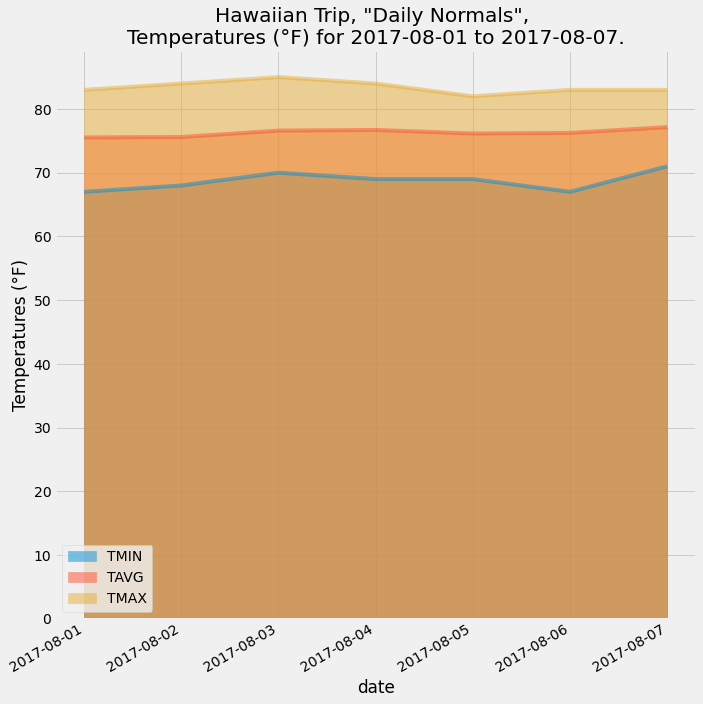

In [193]:
# Plot the daily normals as an area plot with `stacked=False`
dplot=daily_normals_df.plot(kind='area',stacked=False,figsize=(10,10))
dplot.set_ylabel("Temperatures (°F)")
dplot.set_title(f'Hawaiian Trip, "Daily Normals", \nTemperatures (°F) for {start_date} to {end_date}.')
plt.savefig(f"Hawaiian_Trip_Daily_Normals_Temperatures.png")
plt.tight_layout()
plt.show()

## Close Session

In [194]:
session.close()
engine.dispose()